In [22]:
!pip install datascience


  Using cached https://files.pythonhosted.org/packages/8b/4e/38f2c4d172c640a9099d609c51e3fbc5df0889a221d50a932fee52bd25bf/datascience-0.10.6.tar.gz
  Using cached https://files.pythonhosted.org/packages/72/dd/75ced7437bfa7cb9a88b96ee0177953062803c3b4cde411a97d98c35adaf/folium-0.2.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/09/4f/89b06c7fdc09687bca507dc411c342556ef9c5a3b26756137a4878ff19bf/coverage-3.7.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/7d/16/db9bcd676fea5cc45980e24ce66c77f348cf3c750d9c2c7bebd8b8792bf1/coveralls-0.5.zip
  Using cached https://files.pythonhosted.org/packages/a2/55/8f8cab2afd404cf578136ef2cc5dfb50baa1761b68c9da1fb1e4eed343c9/docopt-0.6.2.tar.gz
  Running setup.py bdist_wheel for datascience ... done
  Stored in directory: /Users/aarish/Library/Caches/pip/wheels/da/24/ce/c7c52ff09b932c681f314c3c0afc9117964c444ec393a5d8b9
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /Users/aarish/Library/Caches/pi

In [23]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [24]:
ESG_table = Table.read_table('ESGPorfolios_forcsv.csv')
ESG_sorted =  ESG_table.sort("Total_Var_Cost_USDperMWH")

We read the dataset in the form of a table and sort it in ascending order according to the Total_VarCost. Thus, the plants that are cheaper to run are at the top.

In [25]:
ESG_sorted

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Unnamed: 11,Unnamed: 12,Unnamed: 13
Old Timers,7,BIG CREEK,1000,nan,0,0,0,0,0,"$15,000",nan,nan,nan
Fossil Light,8,HELMS,800,nan,0,0,0.5,0.5,0,"$15,000",nan,nan,nan
Fossil Light,8,DIABLO CANYON 1,1000,1,7.5,7.5,4,11.5,0,"$20,000",nan,nan,nan
Bay Views,4,MOSS LANDING 6,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000",nan,nan,nan
Bay Views,4,MOSS LANDING 7,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000",nan,nan,nan
Old Timers,7,MOHAVE 1,750,10,3,30,4.5,34.5,0.94,"$15,000",nan,nan,nan
Old Timers,7,MOHAVE 2,750,10,3,30,4.5,34.5,0.94,"$15,000",nan,nan,nan
Big Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000",nan,nan,nan
Bay Views,4,MORRO BAY 3&4,665,8.02,4.5,36.11,0.5,36.61,0.43,"$4,000",nan,nan,nan
East Bay,6,PITTSBURGH 5&6,650,8.02,4.5,36.11,0.5,36.61,0.43,"$2,500",nan,nan,nan


Now, from the original table, we extract information about one particular group: Big Coal. We make 2 arrays, **width_coal** and **height_coal**. The items of the **width_coal** array are basically the capacity of Big Coal plants in MWH while **height_coal** contains their cost in USD per MWH.

In [26]:
Big_Coal= ESG_sorted.where("Group","Big Coal")
Big_Coal
width_coal = Big_Coal.column("Capacity_MW")
width_coal
height_coal = Big_Coal.column("Total_Var_Cost_USDperMWH")
height_coal

array([36.5 , 40.5 , 41.94, 41.94, 66.5 , 73.72])

In [27]:
"""
Given widths sorted in ascending order, returns the y_positions used to graph the capacity vs variable costs bar graph
"""

def find_y_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    y_pos = []
    for i in range(0, len(half_widths)):
        y_pos.append(half_widths[i] + cumulative_widths[i])
    return y_pos


After defining the **find_y_pos function**, we just call it on our **width_coal** array to get y positions of each capacity.

In [28]:
new_y_coal = find_y_pos(width_coal)
new_y_coal

[950.0, 2050.0, 2375.0, 3025.0, 3575.0, 3775.0]

Now we make a bar plot of the data we have collected so far, with the y_positions on the x axis plotted against the Variable Cost.

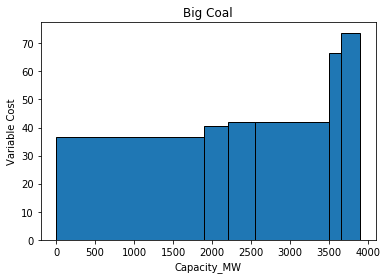

In [29]:
# Make the plot
plt.bar(new_y_coal, height_coal, width=width_coal)
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Big Coal')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

Now we repeat the same process for all the energy sources. Since we are not concerned with any one particular group here, we use the original **ESG_sorted** table.

In [47]:
width = ESG_sorted.column("Capacity_MW")
width
height = ESG_sorted.column("Total_Var_Cost_USDperMWH")
height

array([ 0.  ,  0.5 , 11.5 , 32.56, 32.56, 34.5 , 34.5 , 36.5 , 36.61,
       36.61, 38.06, 38.06, 38.78, 39.06, 39.5 , 40.5 , 40.94, 41.22,
       41.67, 41.94, 41.94, 42.39, 42.67, 43.83, 44.83, 47.44, 49.17,
       49.61, 52.06, 52.5 , 53.94, 58.28, 59.72, 61.17, 62.89, 65.5 ,
       66.5 , 69.83, 73.72, 75.61, 75.89, 90.06])

In [48]:
new_y = find_y_pos(width)
new_y

[500.0,
 1400.0,
 2300.0,
 3175.0,
 3925.0,
 4675.0,
 5425.0,
 6750.0,
 8032.5,
 8690.0,
 9365.0,
 10065.0,
 10582.5,
 10900.0,
 11400.0,
 11900.0,
 12375.0,
 13025.0,
 13825.0,
 14475.0,
 15125.0,
 15925.0,
 16675.0,
 17450.0,
 18000.0,
 18275.0,
 18425.0,
 18575.0,
 18725.0,
 19075.0,
 19400.0,
 19525.0,
 19950.0,
 20375.0,
 20525.0,
 20675.0,
 20825.0,
 20975.0,
 21175.0,
 21450.0,
 21725.0,
 21950.0]

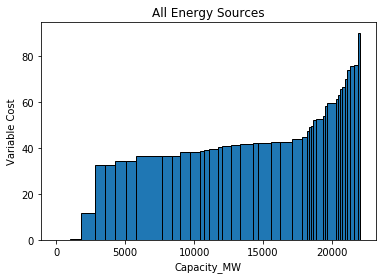

In [49]:
# Make the plot
plt.bar(new_y, height, width=width)
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

* Trying to figure out how to make a legend for this and perhaps better colors, but this segments the graph by energy source

Our aim now is to make a plot which shows all the different groups with unique colors. The first step in doing this is creating a dictionary called **energy_colors_dict** in which the groups and colors are a key-value pair. We use the following code to accomplish this:

In [50]:
energy_colors_dict = {}
count = 0
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in set(ESG_sorted['Group']):
    energy_colors_dict[i] = colors[count]
    count += 1

Now, we just map the colors from our dictionary to a series which contains all the groups. Our resultant list will have the same length as the **ESG_sorted** table.

In [51]:
colors_mapped = list(pd.Series(ESG_sorted['Group']).map(energy_colors_dict))

Finally, we add that array as a column to our original table.

In [55]:
ESG_sorted = ESG_sorted.with_column('Color', colors_mapped)

Our plot now shows the Variable Cost and Capacity for each group in a different color.

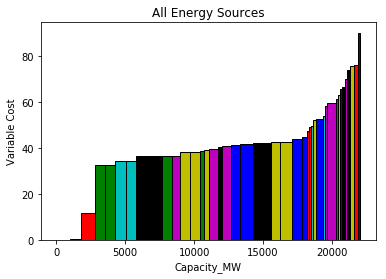

In [57]:
# Make the plot
plt.bar(new_y, height, width=width, color=ESG_sorted['Color'])
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

In [58]:
#set capacity here
capacity = 20000

In [59]:
price = 0

In [39]:
def price_calc(capacity, sorted_table):
    sum_cap = 0
    for i in range(0,len(sorted_table['Capacity_MW'])):
        if sum_cap + sorted_table['Capacity_MW'][i] > capacity:
            global price
            price = sorted_table['Total_Var_Cost_USDperMWH'][i]
            break
        else:
            sum_cap += sorted_table['Capacity_MW'][i]

In [40]:
def price_line_plot():
    global price
    plt.axhline(y=price, color='r', linewidth = 2)
    print("Price: " + str(price))

In [41]:
def capacity_plot():
    global capacity
    plt.axvline(x=capacity, color='r', linewidth = 2)
    print("Capacity: " + str(capacity))

*With Lines for price and quantity

Price: 59.72
Capacity: 20000


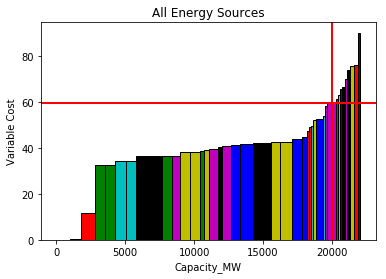

In [42]:
# Make the plot
plt.bar(new_y, height, width=width, color=ESG_sorted['Color'])
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')
price_calc(capacity,ESG_sorted)
price_line_plot()
capacity_plot()

plt.show()

Price: 59.72


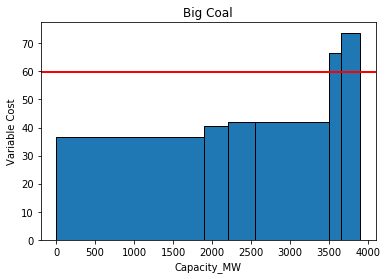

In [43]:
# Make the plot
plt.bar(new_y_coal, height_coal, width=width_coal)
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('Big Coal')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')
price_line_plot()

plt.show()

In [44]:
sum(Big_Coal.where("Total_Var_Cost_USDperMWH", are.below(price))["Total_Var_Cost_USDperMWH"])

160.88

In [45]:
def profit(sorted_table):
    global price
    global capacity
    capacity_subset = sum(sorted_table.where("Total_Var_Cost_USDperMWH", are.below(price))["Capacity_MW"])
    revenue = capacity_subset * price
    cost = sum(sorted_table.where("Total_Var_Cost_USDperMWH", are.below(price))["Total_Var_Cost_USDperMWH"])
    return revenue - cost

In [46]:
profit(Big_Coal)

208859.12